In [1]:
import re
import numpy as np
import ast
import json
import pandas as pd
import matplotlib.pyplot as plt

# Functions

In [2]:
def load_data(filename):
    with open(filename, 'r') as file:
        for line in file:
            lines = line.split('}')
    upd_lines = []
    for line in lines:
        line += "}"
        upd_lines.append(line)
    new_dict = {}
    for line in upd_lines[:-1]:
        x = line.split(":", 1)
        new_dict[x[0]] = ast.literal_eval(x[1])
    return new_dict

def plot_time_series(metric, name):
    fig, ax = plt.subplots()
    plt.style.use('ggplot')
    for m, col in zip('xosdpHPD', metric):
        ax.plot(metric[col], label=metric[col].name, marker=m)
    #ax.plot(metric, label=metric.columns, marker='o')
    ax.set_axisbelow(True)
    ax.set_title(name)
    ax.set_xlabel("Duomenų kiekis kiekvienai tinklo srauto klasei")
    if name == "Apmokymo laikas":
        y_label = "Laikas (s)"
    elif name == "Daugiaklasė klasifikacija - Uždelsimas":
        y_label = "Laikas (ms)"
    else:
        y_label = "Vertė"
    ax.set_ylabel(y_label)
    ax.legend(bbox_to_anchor=(1.05, 1))
    plt.savefig(f"images/results/time_graphs/{name}", bbox_inches='tight')

# Binary classification

In [3]:
bc_results = {'kNN': [0.9922222222222222,
  0.9923018623496586,
  0.9922207841680332,
  0.9922222222222222,
  np.float64(0.9845142044109962),
  0.0077777777777777776,
  0.0077777777777777776,
  0.08819171036881969,
  0.966069221496582,
  0.9626006270009384],
 'LR': [0.9848888888888889,
  0.9850598616118018,
  0.9848842956963745,
  0.9848888888888889,
  np.float64(0.9699274601748047),
  0.015111111111111112,
  0.015111111111111112,
  0.12292725943057184,
  0.0007758140563964844,
  75.7481756499983],
 'RF': [0.996,
  0.9960276677927351,
  0.9959996068453385,
  0.996,
  np.float64(0.9920230561065277),
  0.004,
  0.004,
  0.06324555320336758,
  0.03462815284729004,
  2.3173849470003915],
 'XGBoost': [0.9964444444444445,
  0.9964690078679718,
  0.9964441183457237,
  0.9964444444444445,
  np.float64(0.9929093882256156),
  0.0035555555555555557,
  0.0035555555555555557,
  0.05962847939999439,
  0.004171609878540039,
  0.5634861699982139],
 'LightGBM': [0.9963333333333333,
  0.9963534379042055,
  0.9963330325171798,
  0.9963333333333333,
  np.float64(0.9926826320704351),
  0.0036666666666666666,
  0.0036666666666666666,
  0.060553007081949835,
  0.013403654098510742,
  0.40081445000032545],
 'SVM': [0.991,
  0.9910996883464313,
  0.9909980844503768,
  0.991,
  np.float64(0.9820879462831953),
  0.009,
  0.009,
  0.09486832980505137,
  0.7899854183197021,
  82.40922286600107],
 'FF-NN': [0.9931111335754395,
  0.9931929265955886,
  0.993110765795297,
  0.9931111111111111,
  np.float64(0.9863038915657898),
  0.006888888888888889,
  0.006888888888888889,
  0.08299933065325822,
  0.46701908111572266,
  136.8507272889983],
 'LSTM': [1.0,
  1.0,
  1.0,
  1.0,
  np.float64(1.0),
  0.0,
  0.0,
  0.0,
  0.46701908111572266,
  34.67103273600151]}

In [4]:
bc_results_df = pd.DataFrame.from_dict(bc_results, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE", "Latency (ms)", "Time"])

In [5]:
bc_results_df

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE,Latency (ms),Time
kNN,0.992222,0.992302,0.992221,0.992222,0.984514,0.007778,0.007778,0.088192,0.966069,0.962601
LR,0.984889,0.985060,0.984884,0.984889,0.969927,0.015111,0.015111,0.122927,0.000776,75.748176
RF,0.996000,0.996028,0.996000,0.996000,0.992023,0.004000,0.004000,0.063246,0.034628,2.317385
XGBoost,0.996444,0.996469,0.996444,0.996444,0.992909,0.003556,0.003556,0.059628,0.004172,0.563486
LightGBM,0.996333,0.996353,0.996333,0.996333,0.992683,0.003667,0.003667,0.060553,0.013404,0.400814
SVM,0.991000,0.991100,0.990998,0.991000,0.982088,0.009000,0.009000,0.094868,0.789985,82.409223
FF-NN,0.993111,0.993193,0.993111,0.993111,0.986304,0.006889,0.006889,0.082999,0.467019,136.850727
LSTM,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.467019,34.671033


# Multiclass classification

In [6]:
mc_precision, mc_recall, mc_f1, mc_time, mc_latency, mc_memory = [{} for x in range(6)]

In [7]:
new_dict = load_data('results_1000_mc.txt')
mc_1000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_1000 = pd.DataFrame(mc_1000).transpose().to_dict()

mc_precision['1000'] = mc_1000['Precision']
mc_recall['1000'] = mc_1000['Recall']
mc_f1['1000'] = mc_1000['F1']
mc_time['1000'] = mc_1000['Time']
mc_latency['1000'] = mc_1000['Latency (ms)']

In [8]:
new_dict = load_data('results_5000_mc.txt')
mc_5000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_5000 = pd.DataFrame(mc_5000).transpose().to_dict()

mc_precision['5000'] = mc_5000['Precision']
mc_recall['5000'] = mc_5000['Recall']
mc_f1['5000'] = mc_5000['F1']
mc_time['5000'] = mc_5000['Time']
mc_latency['5000'] = mc_5000['Latency (ms)']

In [9]:
new_dict = load_data('results_10000_mc.txt')
mc_10000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_10000 = pd.DataFrame(mc_10000).transpose().to_dict()

mc_precision['10000'] = mc_10000['Precision']
mc_recall['10000'] = mc_10000['Recall']
mc_f1['10000'] = mc_10000['F1']
mc_time['10000'] = mc_10000['Time']
mc_latency['10000'] = mc_10000['Latency (ms)']

In [10]:
new_dict = load_data('results_15000_mc.txt')
mc_15000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_15000 = pd.DataFrame(mc_15000).transpose().to_dict()

mc_precision['15000'] = mc_15000['Precision']
mc_recall['15000'] = mc_15000['Recall']
mc_f1['15000'] = mc_15000['F1']
mc_time['15000'] = mc_15000['Time']
mc_latency['15000'] = mc_15000['Latency (ms)']

In [11]:
new_dict = load_data('results_30000_mc.txt')
mc_30000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_30000 = pd.DataFrame(mc_30000).transpose().to_dict()

mc_precision['30000'] = mc_30000['Precision']
mc_recall['30000'] = mc_30000['Recall']
mc_f1['30000'] = mc_30000['F1']
mc_time['30000'] = mc_30000['Time']
mc_latency['30000'] = mc_30000['Latency (ms)']

In [12]:
new_dict = load_data('results_60000_mc.txt')
mc_60000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_60000 = pd.DataFrame(mc_60000).transpose().to_dict()

mc_precision['60000'] = mc_60000['Precision']
mc_recall['60000'] = mc_60000['Recall']
mc_f1['60000'] = mc_60000['F1']
mc_time['60000'] = mc_60000['Time']
mc_latency['60000'] = mc_60000['Latency (ms)']

In [13]:
new_dict = load_data('results_90000_mc.txt')
mc_90000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_90000 = pd.DataFrame(mc_90000).transpose().to_dict()

mc_precision['90000'] = mc_90000['Precision']
mc_recall['90000'] = mc_90000['Recall']
mc_f1['90000'] = mc_90000['F1']
mc_time['90000'] = mc_90000['Time']
mc_latency['90000'] = mc_90000['Latency (ms)']

In [14]:
new_dict = load_data('results_120000_mc.txt')
mc_120000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_120000 = pd.DataFrame(mc_120000).transpose().to_dict()

mc_precision['120000'] = mc_120000['Precision']
mc_recall['120000'] = mc_120000['Recall']
mc_f1['120000'] = mc_120000['F1']
mc_time['120000'] = mc_120000['Time']
mc_latency['120000'] = mc_120000['Latency (ms)']

In [15]:
mc_precision = pd.DataFrame(mc_precision).transpose()
mc_precision

,LR,SVM,kNN,RF,XGBoost,LightGBM,FF-NN,LSTM
1000,0.661203,0.730258,0.690576,0.860021,0.884957,0.887566,0.990048,0.999170
5000,0.667300,0.701197,0.703837,0.891946,0.904397,0.907399,0.997689,0.999001
10000,0.666379,0.726710,0.716876,0.896282,0.911101,0.909882,0.994681,0.999833
15000,0.669585,0.726066,0.727276,0.901396,0.913250,0.913281,0.999153,0.999774
30000,0.684421,NaN,0.751966,0.913174,0.921227,0.918479,0.999114,0.999939
60000,0.711378,NaN,0.784262,0.924544,0.930429,0.929242,0.998119,0.999966
90000,0.727830,NaN,0.801188,0.929266,0.935082,0.932474,0.999435,0.999977
120000,0.739261,NaN,0.810643,0.935020,0.938433,0.934765,0.998775,0.999974


In [16]:
mc_recall = pd.DataFrame(mc_recall).transpose()
mc_recall

,LR,SVM,kNN,RF,XGBoost,LightGBM,FF-NN,LSTM
1000,0.641667,0.639167,0.670833,0.852500,0.881667,0.884167,0.990000,0.999165
5000,0.647833,0.650833,0.694333,0.887833,0.900833,0.904667,0.997667,0.998999
10000,0.651083,0.686750,0.710667,0.893083,0.908250,0.906333,0.994583,0.999833
15000,0.655223,0.685545,0.720158,0.897967,0.910728,0.910051,0.999153,0.999774
30000,0.676355,NaN,0.748715,0.910017,0.918370,0.915616,0.999113,0.999939
60000,0.704628,NaN,0.783845,0.923899,0.929546,0.928239,0.998090,0.999966
90000,0.720087,NaN,0.802420,0.928949,0.934809,0.932225,0.999435,0.999977
120000,0.732390,NaN,0.811653,0.934723,0.938399,0.934969,0.998769,0.999974


In [17]:
mc_f1 = pd.DataFrame(mc_f1).transpose()
mc_f1

,LR,SVM,kNN,RF,XGBoost,LightGBM,FF-NN,LSTM
1000,0.639807,0.631790,0.672291,0.853120,0.882236,0.884452,0.990001,0.999164
5000,0.649400,0.657072,0.695225,0.888123,0.901008,0.904805,0.997669,0.999000
10000,0.650375,0.690658,0.711321,0.893260,0.908408,0.906501,0.994585,0.999833
15000,0.654828,0.688714,0.721253,0.898260,0.910898,0.910201,0.999153,0.999774
30000,0.669752,NaN,0.748500,0.910120,0.918404,0.915583,0.999113,0.999939
60000,0.692048,NaN,0.781611,0.923473,0.929424,0.928095,0.998096,0.999966
90000,0.704764,NaN,0.799227,0.928018,0.934376,0.931764,0.999435,0.999977
120000,0.718797,NaN,0.808338,0.933679,0.937770,0.934330,0.998769,0.999974


In [18]:
mc_time = pd.DataFrame(mc_time).transpose()
mc_time

,LR,SVM,kNN,RF,XGBoost,LightGBM,FF-NN,LSTM
1000,6.810390,8.644262,0.085869,0.419205,1.313370,1.119661,20.635115,14.939409
5000,154.537514,255.579531,0.354161,1.765341,2.059698,1.894585,79.068064,59.285223
10000,328.953492,1533.474163,1.254727,3.824280,3.256515,3.110003,148.851978,113.566991
15000,542.078285,2508.020525,2.565603,5.910444,5.977717,3.377489,221.944975,170.449142
30000,907.460055,NaN,7.559374,10.615231,6.414978,5.670103,408.856969,312.177685
60000,2126.192968,NaN,25.794604,20.706662,11.827961,9.957066,738.803348,567.620931
90000,3843.034194,NaN,53.407333,31.290986,17.233080,14.411167,1097.386344,823.118289
120000,5220.874631,NaN,92.239226,41.765874,22.659579,18.360238,1417.602499,1094.248772


In [19]:
mc_latency = pd.DataFrame(mc_latency).transpose()
mc_latency

,LR,SVM,kNN,RF,XGBoost,LightGBM,FF-NN,LSTM
1000,0.000400,0.254545,0.021075,0.049582,0.004689,0.023928,0.105837,0.138848
5000,0.002302,5.991184,0.377391,0.045513,0.016477,0.075964,0.315305,0.499766
10000,0.001654,24.768201,1.362254,0.057572,0.055520,0.145357,0.493521,0.823728
15000,0.005810,41.289522,2.625829,0.080033,0.050524,0.213678,0.728268,1.248988
30000,0.005939,NaN,7.638444,0.152675,0.092655,0.383294,1.412566,2.221812
60000,0.008029,NaN,27.097951,0.274629,0.177358,0.725493,2.347456,3.821511
90000,0.015364,NaN,54.031376,0.401705,0.266626,1.036593,3.379534,5.386210
120000,0.023005,NaN,94.191304,0.543453,0.342543,1.376279,4.285737,7.124579


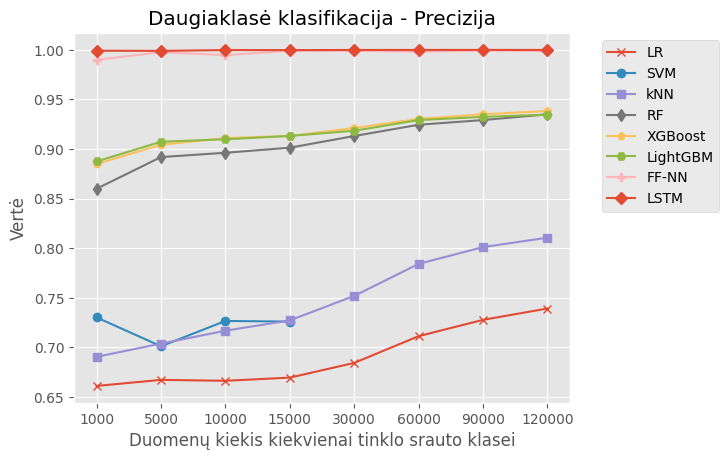

In [76]:
plot_time_series(mc_precision, "Daugiaklasė klasifikacija - Precizija")

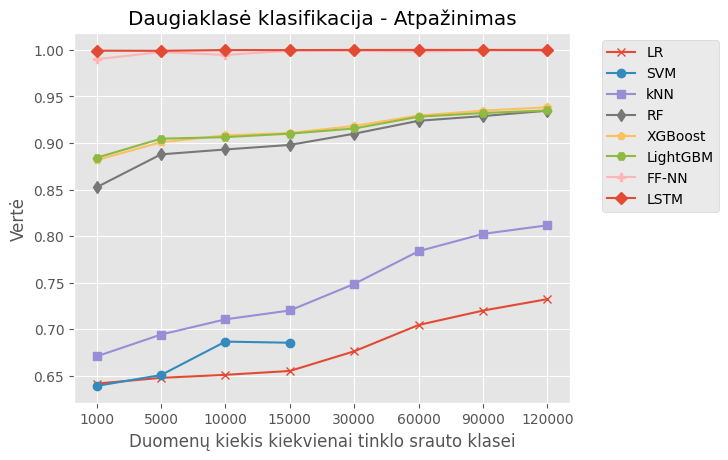

In [21]:
plot_time_series(mc_recall, "Daugiaklasė klasifikacija - Atpažinimas")

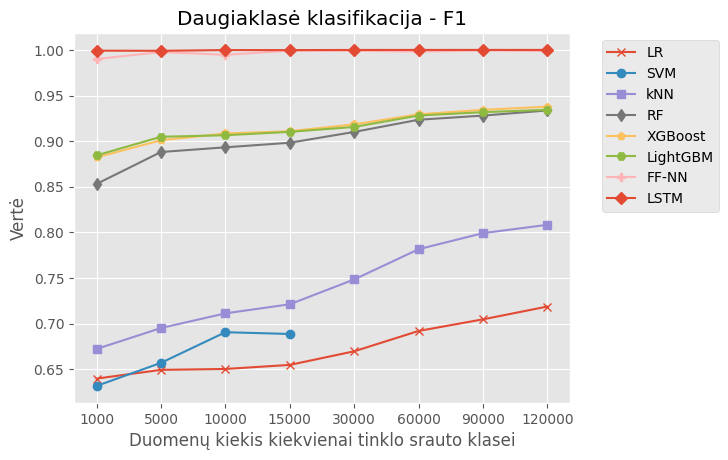

In [22]:
plot_time_series(mc_f1, "Daugiaklasė klasifikacija - F1")

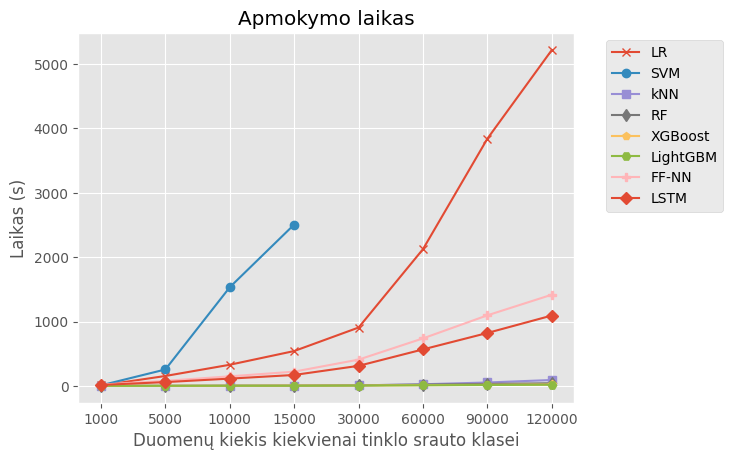

In [23]:
plot_time_series(mc_time, "Apmokymo laikas")

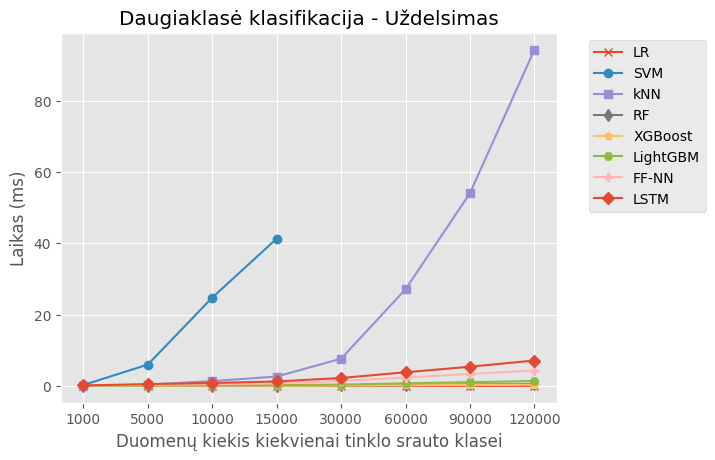

In [24]:
plot_time_series(mc_latency, "Daugiaklasė klasifikacija - Uždelsimas")

# Results by class

## Precision

In [25]:
benign_precision, bruteforce_precision, ddos_precision, dos_precision, mirai_precision, recon_precision, spoofing_precision, web_precision = [{} for x in range(8)]

In [26]:
new_dict = load_data('results_1000_precision.txt')
precision_1000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['1000'] = precision_1000['Benign']
bruteforce_precision['1000'] = precision_1000['Bruteforce']
ddos_precision['1000'] = precision_1000['DDoS']
dos_precision['1000'] = precision_1000['DoS']
mirai_precision['1000'] = precision_1000['Mirai']
recon_precision['1000'] = precision_1000['Recon']
spoofing_precision['1000'] = precision_1000['Spoofing']
web_precision['1000'] = precision_1000['Web']

In [27]:
new_dict = load_data('results_5000_precision.txt')
precision_5000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['5000'] = precision_5000['Benign']
bruteforce_precision['5000'] = precision_5000['Bruteforce']
ddos_precision['5000'] = precision_5000['DDoS']
dos_precision['5000'] = precision_5000['DoS']
mirai_precision['5000'] = precision_5000['Mirai']
recon_precision['5000'] = precision_5000['Recon']
spoofing_precision['5000'] = precision_5000['Spoofing']
web_precision['5000'] = precision_5000['Web']

In [28]:
new_dict = load_data('results_10000_precision.txt')
precision_10000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['10000'] = precision_10000['Benign']
bruteforce_precision['10000'] = precision_10000['Bruteforce']
ddos_precision['10000'] = precision_10000['DDoS']
dos_precision['10000'] = precision_10000['DoS']
mirai_precision['10000'] = precision_10000['Mirai']
recon_precision['10000'] = precision_10000['Recon']
spoofing_precision['10000'] = precision_10000['Spoofing']
web_precision['10000'] = precision_10000['Web']

In [29]:
new_dict = load_data('results_15000_precision.txt')
precision_15000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['15000'] = precision_15000['Benign']
bruteforce_precision['15000'] = precision_15000['Bruteforce']
ddos_precision['15000'] = precision_15000['DDoS']
dos_precision['15000'] = precision_15000['DoS']
mirai_precision['15000'] = precision_15000['Mirai']
recon_precision['15000'] = precision_15000['Recon']
spoofing_precision['15000'] = precision_15000['Spoofing']
web_precision['15000'] = precision_15000['Web']

In [30]:
new_dict = load_data('results_30000_precision.txt')
precision_30000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['30000'] = precision_30000['Benign']
bruteforce_precision['30000'] = precision_30000['Bruteforce']
ddos_precision['30000'] = precision_30000['DDoS']
dos_precision['30000'] = precision_30000['DoS']
mirai_precision['30000'] = precision_30000['Mirai']
recon_precision['30000'] = precision_30000['Recon']
spoofing_precision['30000'] = precision_30000['Spoofing']
web_precision['30000'] = precision_30000['Web']

In [31]:
new_dict = load_data('results_60000_precision.txt')
precision_60000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['60000'] = precision_60000['Benign']
bruteforce_precision['60000'] = precision_60000['Bruteforce']
ddos_precision['60000'] = precision_60000['DDoS']
dos_precision['60000'] = precision_60000['DoS']
mirai_precision['60000'] = precision_60000['Mirai']
recon_precision['60000'] = precision_60000['Recon']
spoofing_precision['60000'] = precision_60000['Spoofing']
web_precision['60000'] = precision_60000['Web']

In [32]:
new_dict = load_data('results_90000_precision.txt')
precision_90000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['90000'] = precision_90000['Benign']
bruteforce_precision['90000'] = precision_90000['Bruteforce']
ddos_precision['90000'] = precision_90000['DDoS']
dos_precision['90000'] = precision_90000['DoS']
mirai_precision['90000'] = precision_90000['Mirai']
recon_precision['90000'] = precision_90000['Recon']
spoofing_precision['90000'] = precision_90000['Spoofing']
web_precision['90000'] = precision_90000['Web']

In [33]:
new_dict = load_data('results_120000_precision.txt')
precision_120000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['120000'] = precision_120000['Benign']
bruteforce_precision['120000'] = precision_120000['Bruteforce']
ddos_precision['120000'] = precision_120000['DDoS']
dos_precision['120000'] = precision_120000['DoS']
mirai_precision['120000'] = precision_120000['Mirai']
recon_precision['120000'] = precision_120000['Recon']
spoofing_precision['120000'] = precision_120000['Spoofing']
web_precision['120000'] = precision_120000['Web']

## Recall

In [34]:
benign_recall, bruteforce_recall, ddos_recall, dos_recall, mirai_recall, recon_recall, spoofing_recall, web_recall = [{} for x in range(8)]

In [35]:
new_dict = load_data('results_1000_recall.txt')
recall_1000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['1000'] = recall_1000['Benign']
bruteforce_recall['1000'] = recall_1000['Bruteforce']
ddos_recall['1000'] = recall_1000['DDoS']
dos_recall['1000'] = recall_1000['DoS']
mirai_recall['1000'] = recall_1000['Mirai']
recon_recall['1000'] = recall_1000['Recon']
spoofing_recall['1000'] = recall_1000['Spoofing']
web_recall['1000'] = recall_1000['Web']

In [36]:
new_dict = load_data('results_5000_recall.txt')
recall_5000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['5000'] = recall_5000['Benign']
bruteforce_recall['5000'] = recall_5000['Bruteforce']
ddos_recall['5000'] = recall_5000['DDoS']
dos_recall['5000'] = recall_5000['DoS']
mirai_recall['5000'] = recall_5000['Mirai']
recon_recall['5000'] = recall_5000['Recon']
spoofing_recall['5000'] = recall_5000['Spoofing']
web_recall['5000'] = recall_5000['Web']

In [37]:
new_dict = load_data('results_10000_recall.txt')
recall_10000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['10000'] = recall_10000['Benign']
bruteforce_recall['10000'] = recall_10000['Bruteforce']
ddos_recall['10000'] = recall_10000['DDoS']
dos_recall['10000'] = recall_10000['DoS']
mirai_recall['10000'] = recall_10000['Mirai']
recon_recall['10000'] = recall_10000['Recon']
spoofing_recall['10000'] = recall_10000['Spoofing']
web_recall['10000'] = recall_10000['Web']

In [38]:
new_dict = load_data('results_15000_recall.txt')
recall_15000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['15000'] = recall_15000['Benign']
bruteforce_recall['15000'] = recall_15000['Bruteforce']
ddos_recall['15000'] = recall_15000['DDoS']
dos_recall['15000'] = recall_15000['DoS']
mirai_recall['15000'] = recall_15000['Mirai']
recon_recall['15000'] = recall_15000['Recon']
spoofing_recall['15000'] = recall_15000['Spoofing']
web_recall['15000'] = recall_15000['Web']

In [39]:
new_dict = load_data('results_30000_recall.txt')
recall_30000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['30000'] = recall_30000['Benign']
bruteforce_recall['30000'] = recall_30000['Bruteforce']
ddos_recall['30000'] = recall_30000['DDoS']
dos_recall['30000'] = recall_30000['DoS']
mirai_recall['30000'] = recall_30000['Mirai']
recon_recall['30000'] = recall_30000['Recon']
spoofing_recall['30000'] = recall_30000['Spoofing']
web_recall['30000'] = recall_30000['Web']

In [40]:
new_dict = load_data('results_60000_recall.txt')
recall_60000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['60000'] = recall_60000['Benign']
bruteforce_recall['60000'] = recall_60000['Bruteforce']
ddos_recall['60000'] = recall_60000['DDoS']
dos_recall['60000'] = recall_60000['DoS']
mirai_recall['60000'] = recall_60000['Mirai']
recon_recall['60000'] = recall_60000['Recon']
spoofing_recall['60000'] = recall_60000['Spoofing']
web_recall['60000'] = recall_60000['Web']

In [41]:
new_dict = load_data('results_90000_recall.txt')
recall_90000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['90000'] = recall_90000['Benign']
bruteforce_recall['90000'] = recall_90000['Bruteforce']
ddos_recall['90000'] = recall_90000['DDoS']
dos_recall['90000'] = recall_90000['DoS']
mirai_recall['90000'] = recall_90000['Mirai']
recon_recall['90000'] = recall_90000['Recon']
spoofing_recall['90000'] = recall_90000['Spoofing']
web_recall['90000'] = recall_90000['Web']

In [42]:
new_dict = load_data('results_120000_recall.txt')
recall_120000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['120000'] = recall_120000['Benign']
bruteforce_recall['120000'] = recall_120000['Bruteforce']
ddos_recall['120000'] = recall_120000['DDoS']
dos_recall['120000'] = recall_120000['DoS']
mirai_recall['120000'] = recall_120000['Mirai']
recon_recall['120000'] = recall_120000['Recon']
spoofing_recall['120000'] = recall_120000['Spoofing']
web_recall['120000'] = recall_120000['Web']

# F1

In [43]:
benign_f1, bruteforce_f1, ddos_f1, dos_f1, mirai_f1, recon_f1, spoofing_f1, web_f1 = [{} for x in range(8)]

In [44]:
new_dict = load_data('results_1000_f1.txt')
f1_1000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['1000'] = f1_1000['Benign']
bruteforce_f1['1000'] = f1_1000['Bruteforce']
ddos_f1['1000'] = f1_1000['DDoS']
dos_f1['1000'] = f1_1000['DoS']
mirai_f1['1000'] = f1_1000['Mirai']
recon_f1['1000'] = f1_1000['Recon']
spoofing_f1['1000'] = f1_1000['Spoofing']
web_f1['1000'] = f1_1000['Web']

In [45]:
new_dict = load_data('results_5000_f1.txt')
f1_5000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['5000'] = f1_5000['Benign']
bruteforce_f1['5000'] = f1_5000['Bruteforce']
ddos_f1['5000'] = f1_5000['DDoS']
dos_f1['5000'] = f1_5000['DoS']
mirai_f1['5000'] = f1_5000['Mirai']
recon_f1['5000'] = f1_5000['Recon']
spoofing_f1['5000'] = f1_5000['Spoofing']
web_f1['5000'] = f1_5000['Web']

In [46]:
new_dict = load_data('results_10000_f1.txt')
f1_10000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['10000'] = f1_10000['Benign']
bruteforce_f1['10000'] = f1_10000['Bruteforce']
ddos_f1['10000'] = f1_10000['DDoS']
dos_f1['10000'] = f1_10000['DoS']
mirai_f1['10000'] = f1_10000['Mirai']
recon_f1['10000'] = f1_10000['Recon']
spoofing_f1['10000'] = f1_10000['Spoofing']
web_f1['10000'] = f1_10000['Web']

In [47]:
new_dict = load_data('results_15000_f1.txt')
f1_15000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['15000'] = f1_15000['Benign']
bruteforce_f1['15000'] = f1_15000['Bruteforce']
ddos_f1['15000'] = f1_15000['DDoS']
dos_f1['15000'] = f1_15000['DoS']
mirai_f1['15000'] = f1_15000['Mirai']
recon_f1['15000'] = f1_15000['Recon']
spoofing_f1['15000'] = f1_15000['Spoofing']
web_f1['15000'] = f1_15000['Web']

In [48]:
new_dict = load_data('results_30000_f1.txt')
f1_30000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['30000'] = f1_30000['Benign']
bruteforce_f1['30000'] = f1_30000['Bruteforce']
ddos_f1['30000'] = f1_30000['DDoS']
dos_f1['30000'] = f1_30000['DoS']
mirai_f1['30000'] = f1_30000['Mirai']
recon_f1['30000'] = f1_30000['Recon']
spoofing_f1['30000'] = f1_30000['Spoofing']
web_f1['30000'] = f1_30000['Web']

In [49]:
new_dict = load_data('results_60000_f1.txt')
f1_60000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['60000'] = f1_60000['Benign']
bruteforce_f1['60000'] = f1_60000['Bruteforce']
ddos_f1['60000'] = f1_60000['DDoS']
dos_f1['60000'] = f1_60000['DoS']
mirai_f1['60000'] = f1_60000['Mirai']
recon_f1['60000'] = f1_60000['Recon']
spoofing_f1['60000'] = f1_60000['Spoofing']
web_f1['60000'] = f1_60000['Web']

In [50]:
new_dict = load_data('results_90000_f1.txt')
f1_90000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['90000'] = f1_90000['Benign']
bruteforce_f1['90000'] = f1_90000['Bruteforce']
ddos_f1['90000'] = f1_90000['DDoS']
dos_f1['90000'] = f1_90000['DoS']
mirai_f1['90000'] = f1_90000['Mirai']
recon_f1['90000'] = f1_90000['Recon']
spoofing_f1['90000'] = f1_90000['Spoofing']
web_f1['90000'] = f1_90000['Web']

In [51]:
new_dict = load_data('results_120000_f1.txt')
f1_120000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['120000'] = f1_120000['Benign']
bruteforce_f1['120000'] = f1_120000['Bruteforce']
ddos_f1['120000'] = f1_120000['DDoS']
dos_f1['120000'] = f1_120000['DoS']
mirai_f1['120000'] = f1_120000['Mirai']
recon_f1['120000'] = f1_120000['Recon']
spoofing_f1['120000'] = f1_120000['Spoofing']
web_f1['120000'] = f1_120000['Web']

# Plot results by class

## Precision

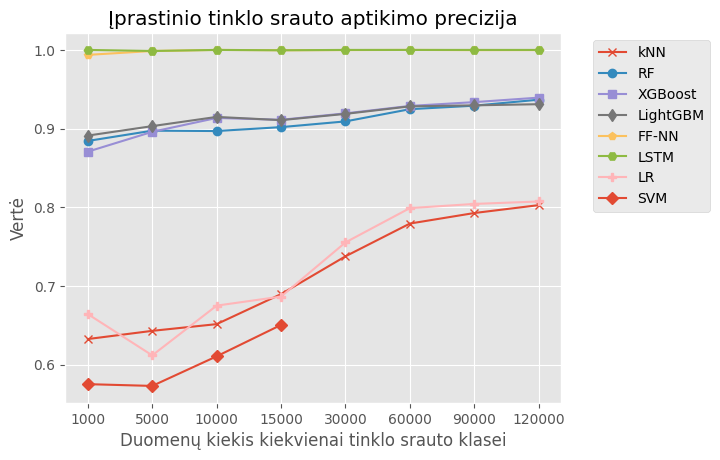

In [52]:
benign_precision = pd.DataFrame(benign_precision).transpose()
plot_time_series(benign_precision, "Įprastinio tinklo srauto aptikimo precizija")

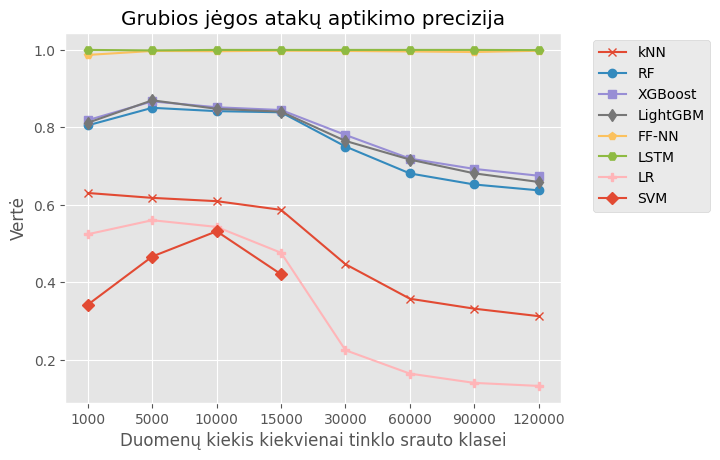

In [53]:
bruteforce_precision = pd.DataFrame(bruteforce_precision).transpose()
plot_time_series(bruteforce_precision, "Grubios jėgos atakų aptikimo precizija")

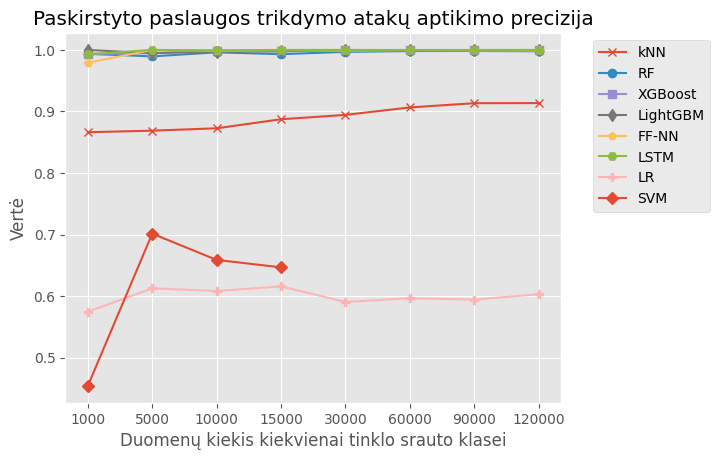

In [54]:
ddos_precision = pd.DataFrame(ddos_precision).transpose()
plot_time_series(ddos_precision, "Paskirstyto paslaugos trikdymo atakų aptikimo precizija")

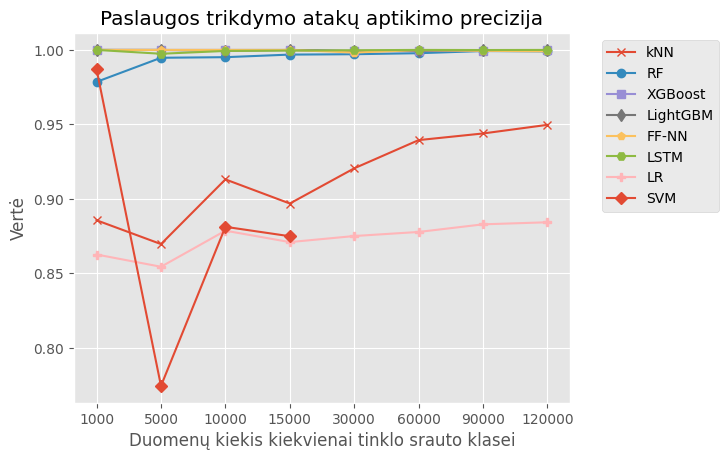

In [55]:
dos_precision = pd.DataFrame(dos_precision).transpose()
plot_time_series(dos_precision, "Paslaugos trikdymo atakų aptikimo precizija")

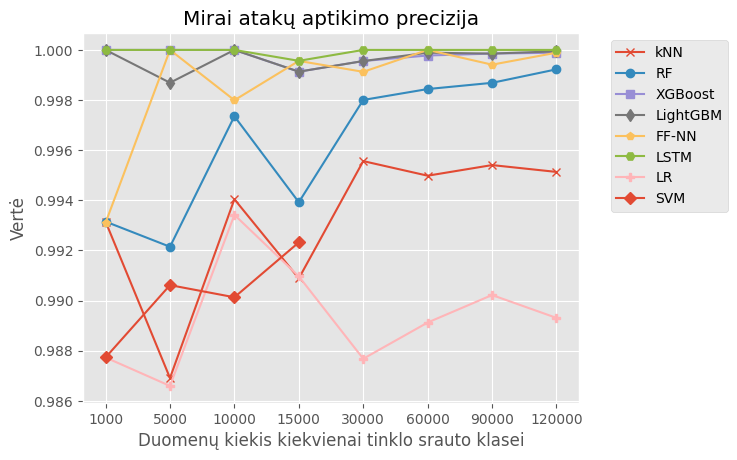

In [56]:
mirai_precision = pd.DataFrame(mirai_precision).transpose()
plot_time_series(mirai_precision, "Mirai atakų aptikimo precizija")

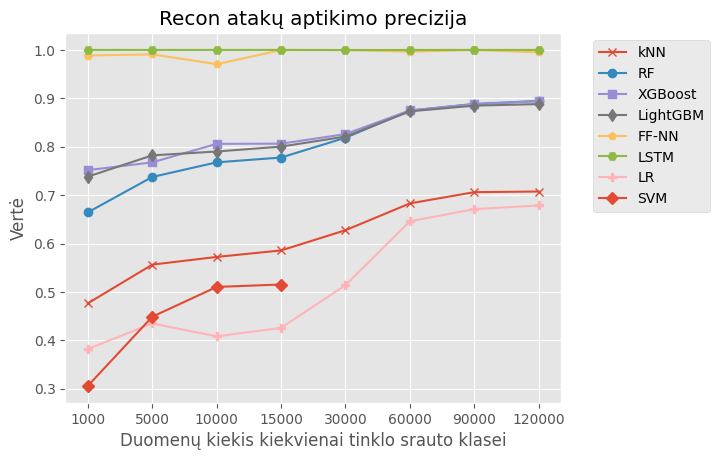

In [57]:
recon_precision = pd.DataFrame(recon_precision).transpose()
plot_time_series(recon_precision, "Recon atakų aptikimo precizija")

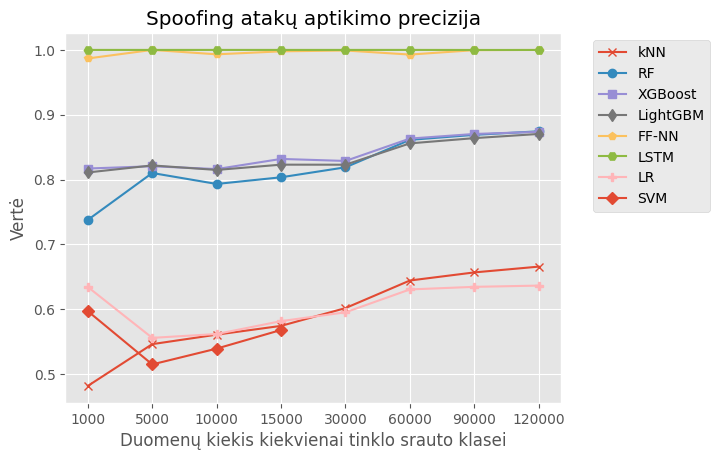

In [58]:
spoofing_precision = pd.DataFrame(spoofing_precision).transpose()
plot_time_series(spoofing_precision, "Spoofing atakų aptikimo precizija")

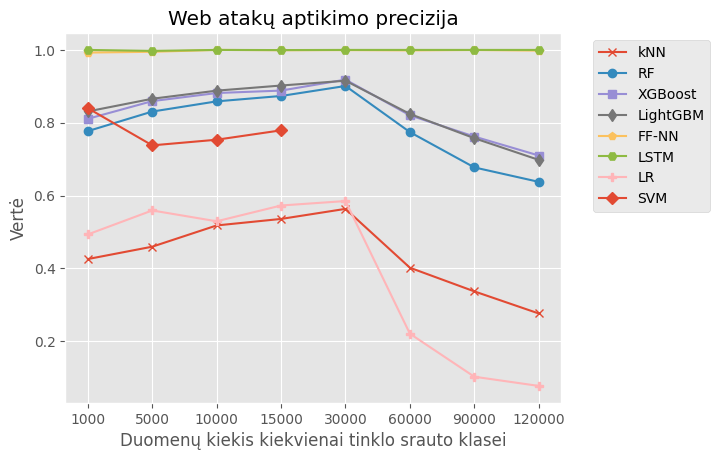

In [59]:
web_precision = pd.DataFrame(web_precision).transpose()
plot_time_series(web_precision, "Web atakų aptikimo precizija")

## Recall

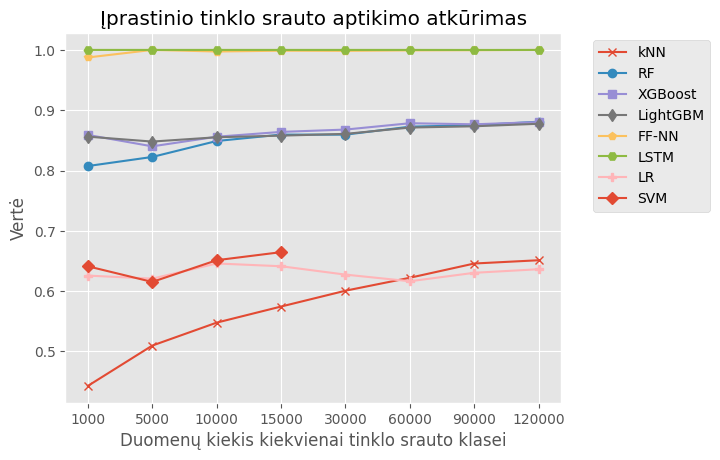

In [60]:
benign_recall = pd.DataFrame(benign_recall).transpose()
plot_time_series(benign_recall, "Įprastinio tinklo srauto aptikimo atkūrimas")

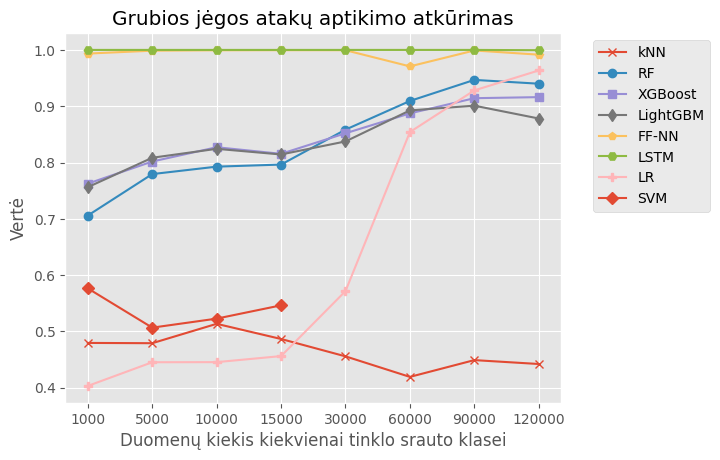

In [61]:
bruteforce_recall = pd.DataFrame(bruteforce_recall).transpose()
plot_time_series(bruteforce_recall, "Grubios jėgos atakų aptikimo atkūrimas")

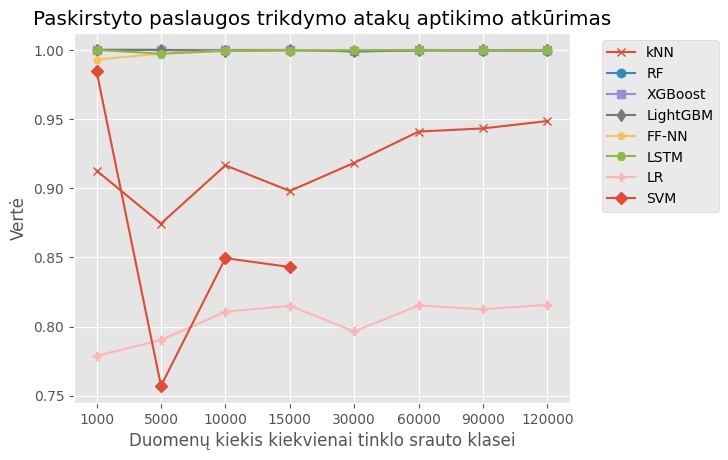

In [62]:
ddos_recall = pd.DataFrame(ddos_recall).transpose()
plot_time_series(ddos_recall, "Paskirstyto paslaugos trikdymo atakų aptikimo atkūrimas")

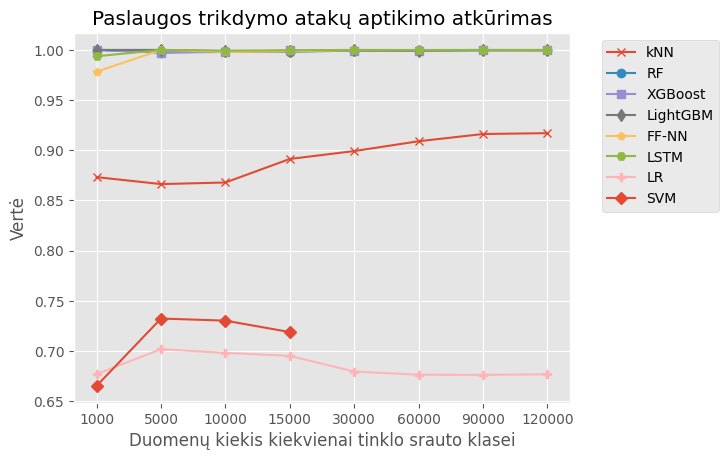

In [63]:
dos_recall = pd.DataFrame(dos_recall).transpose()
plot_time_series(dos_recall, "Paslaugos trikdymo atakų aptikimo atkūrimas")

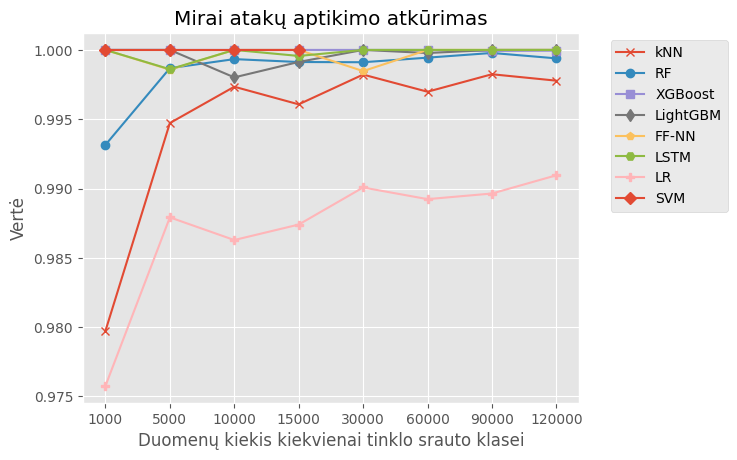

In [64]:
mirai_recall = pd.DataFrame(mirai_recall).transpose()
plot_time_series(mirai_recall, "Mirai atakų aptikimo atkūrimas")

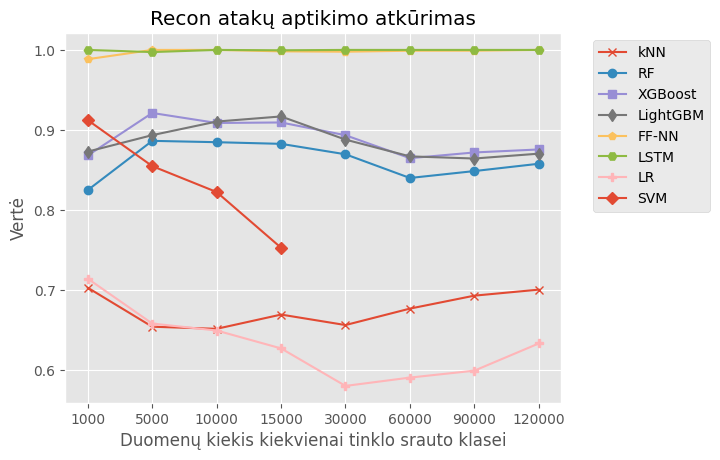

In [65]:
recon_recall = pd.DataFrame(recon_recall).transpose()
plot_time_series(recon_recall, "Recon atakų aptikimo atkūrimas")

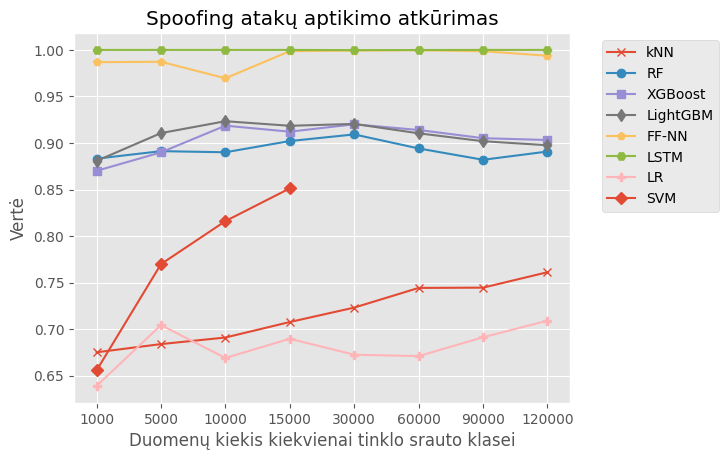

In [66]:
spoofing_recall = pd.DataFrame(spoofing_recall).transpose()
plot_time_series(spoofing_recall, "Spoofing atakų aptikimo atkūrimas")

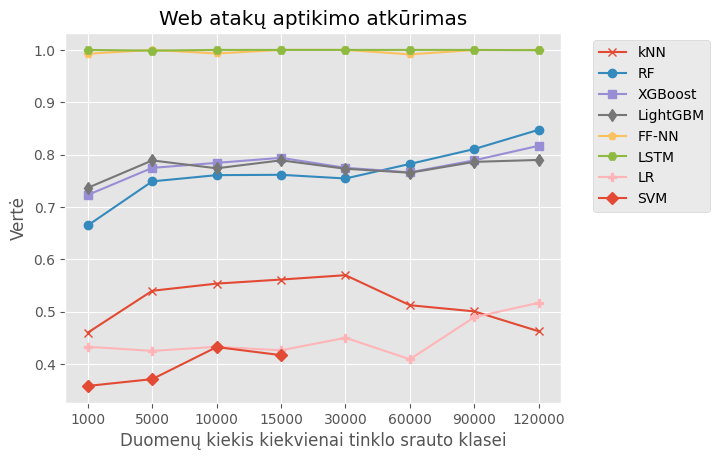

In [67]:
web_recall = pd.DataFrame(web_recall).transpose()
plot_time_series(web_recall, "Web atakų aptikimo atkūrimas")

## F1

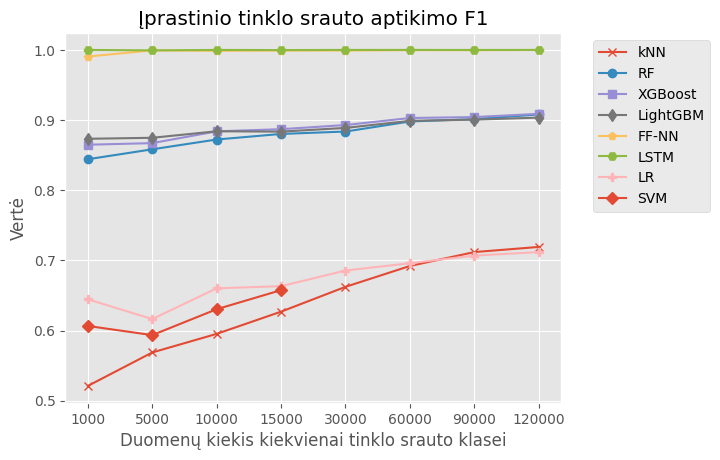

In [68]:
benign_f1 = pd.DataFrame(benign_f1).transpose()
plot_time_series(benign_f1, "Įprastinio tinklo srauto aptikimo F1")

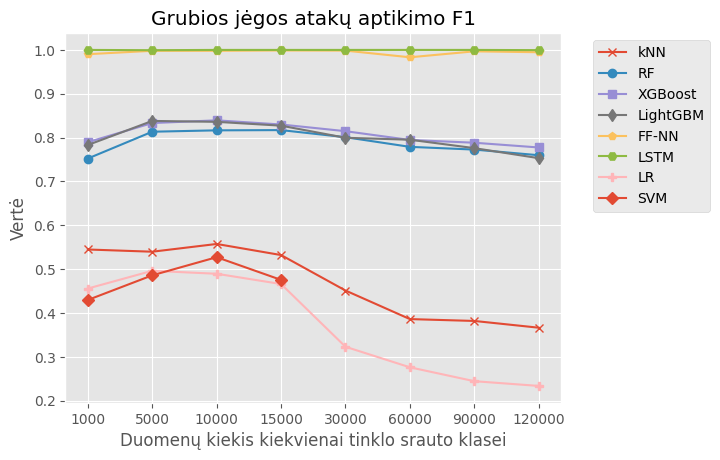

In [69]:
bruteforce_f1 = pd.DataFrame(bruteforce_f1).transpose()
plot_time_series(bruteforce_f1, "Grubios jėgos atakų aptikimo F1")

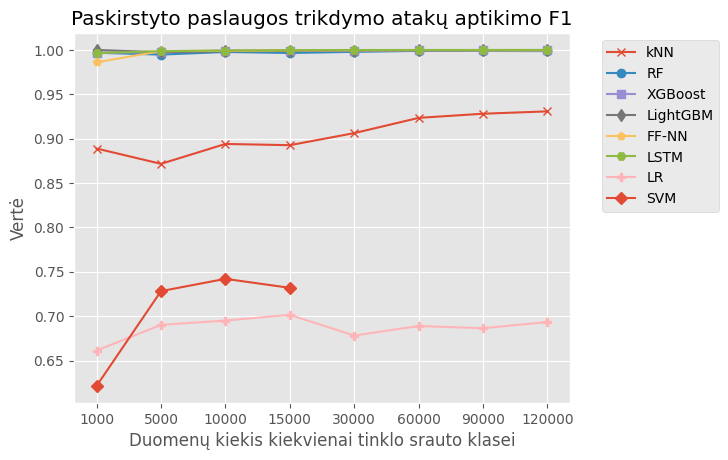

In [70]:
ddos_f1 = pd.DataFrame(ddos_f1).transpose()
plot_time_series(ddos_f1, "Paskirstyto paslaugos trikdymo atakų aptikimo F1")

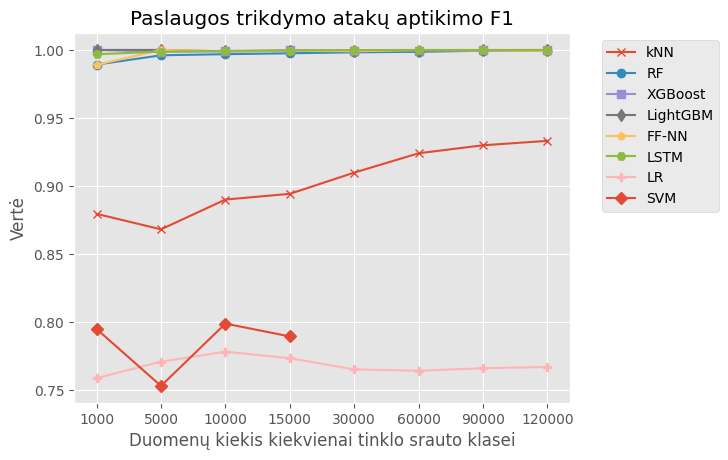

In [71]:
dos_f1 = pd.DataFrame(dos_f1).transpose()
plot_time_series(dos_f1, "Paslaugos trikdymo atakų aptikimo F1")

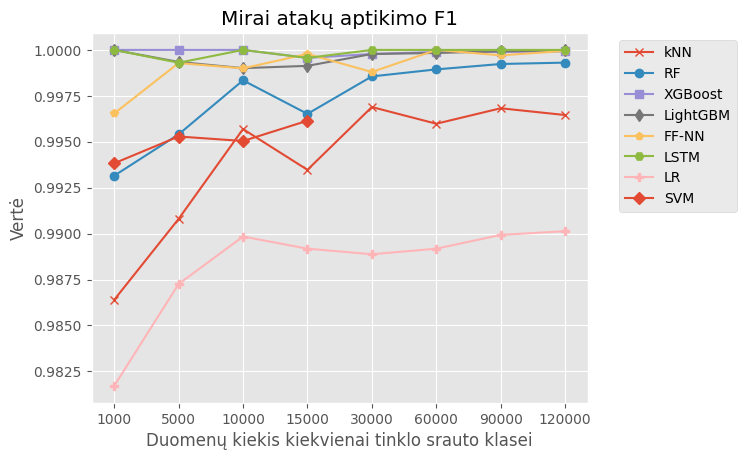

In [72]:
mirai_f1 = pd.DataFrame(mirai_f1).transpose()
plot_time_series(mirai_f1, "Mirai atakų aptikimo F1")

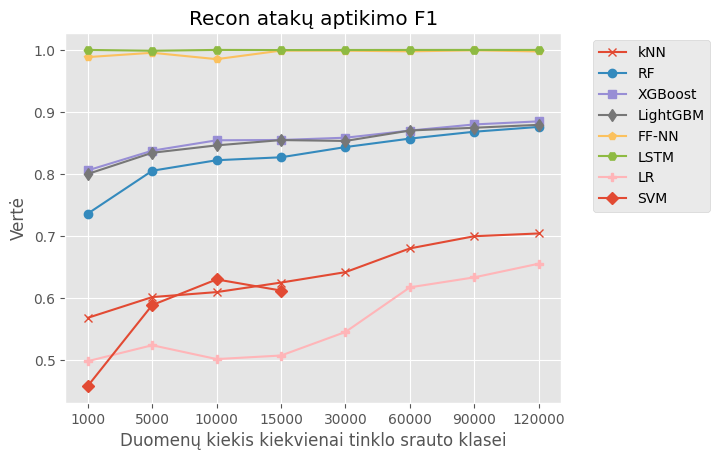

In [73]:
recon_f1 = pd.DataFrame(recon_f1).transpose()
plot_time_series(recon_f1, "Recon atakų aptikimo F1")

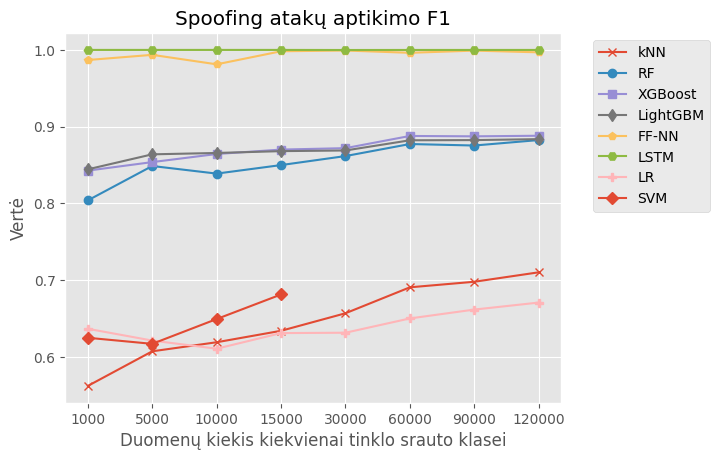

In [74]:
spoofing_f1 = pd.DataFrame(spoofing_f1).transpose()
plot_time_series(spoofing_f1, "Spoofing atakų aptikimo F1")

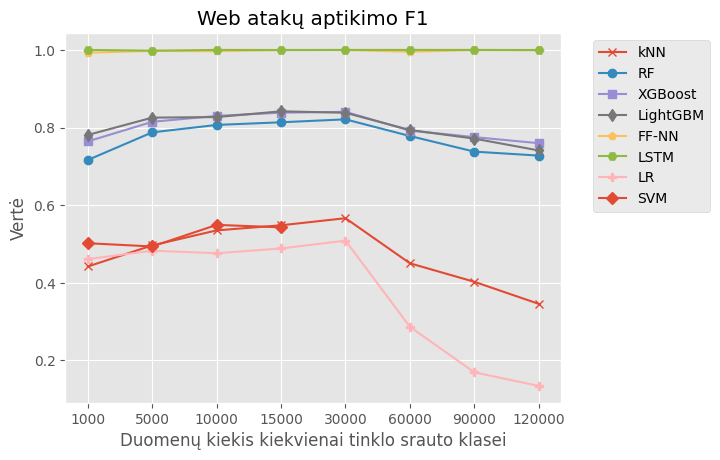

In [75]:
web_f1 = pd.DataFrame(web_f1).transpose()
plot_time_series(web_f1, "Web atakų aptikimo F1")